In [1]:
%load_ext autoreload
%autoreload 2
import sys 
import os
from os import path as pt
sys.path.append('../src')

import seaborn as sns
sns.set_theme()


In [2]:
model_dir = "../trained_models/SP500VIX_timestep_60/model_BetaCVAE_De_CLSTMRes_En_CLSTMRes_Prior_RealNVP_Con_Id_Dis_None_comment_None/BetaCVAE_training_2024-08-22_17-23-52/final_model"
os.makedirs(model_dir,exist_ok=True)

## Evaluation the best model 

In [3]:
from copy import deepcopy
from evaluations.hyperparameter import ModelEvaluator
from tsvae.utils.random_utils import set_seed

model_evaluator = ModelEvaluator(model_dir, base_data_dir = "/Users/hous/GitHub/tc-vae/data")
output_dir = model_evaluator.hyper_model_dir
model = model_evaluator.model

test_data, gen_data, recon_data = model_evaluator.load_data(n_sample_test=2400, seed = 99)
ds = model_evaluator.data_ppl.base_dataset
exp_config = deepcopy(model_evaluator.exp_config)

real_data = test_data
recon_data = recon_data
fake_data = gen_data

Base dataset initialized


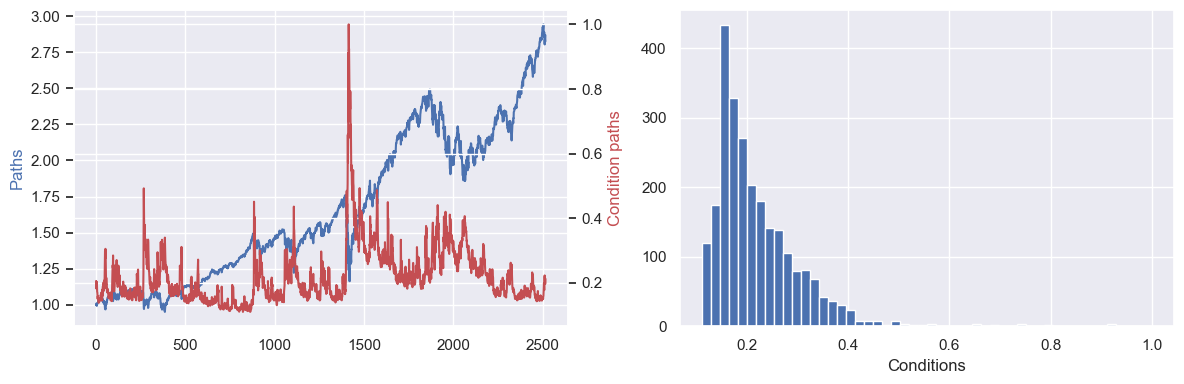

In [4]:
from evaluations.eval_con import plot_path_condition
plot_path_condition(ds.path,ds.vix)

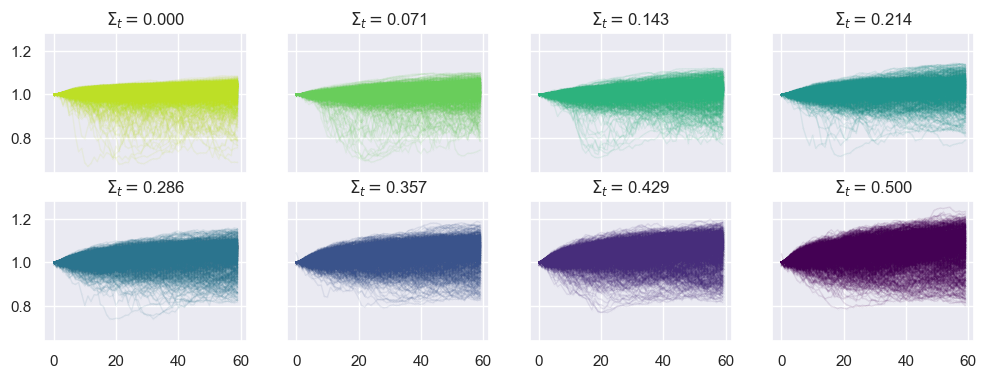

In [5]:
from evaluations.eval_con import con_gen_plot
import numpy as np
conditions = np.linspace(0,0.5,8)
file_path = pt.join(output_dir, 'conditional_generations.png')
con_gen_plot(model, conditions, file_path = file_path)

100%|██████████| 5/5 [00:00<00:00,  5.41it/s]


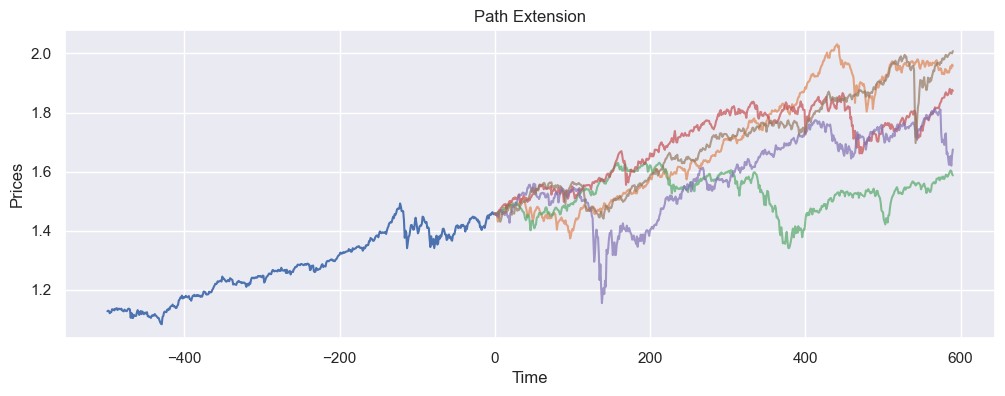

In [6]:
from evaluations.eval_con import plot_path_extension
file_path = pt.join(output_dir, 'path_extension.png')
extended_paths = plot_path_extension(ds.path, model, exp_config, n_extend_path = 5, n_extend_time = 10, file_path=file_path)

100%|██████████| 1/1 [00:16<00:00, 16.98s/it]


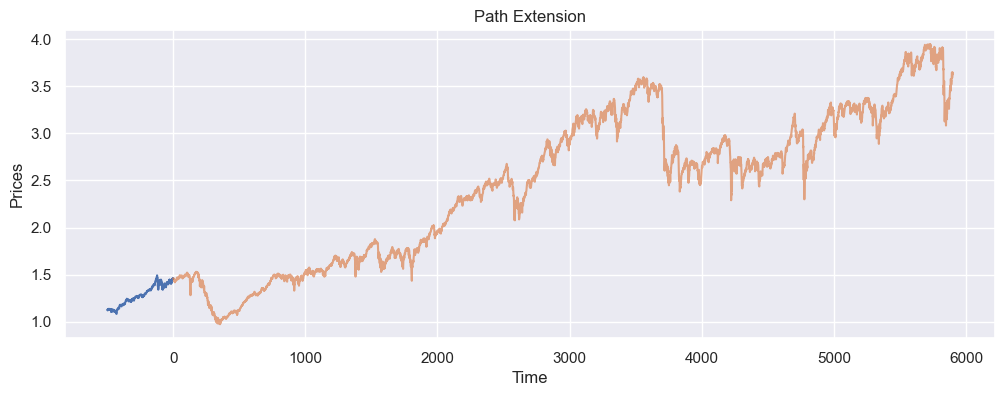

In [7]:
extended_paths_long = plot_path_extension(ds.path, model, exp_config, n_extend_path = 1, n_extend_time = 100)

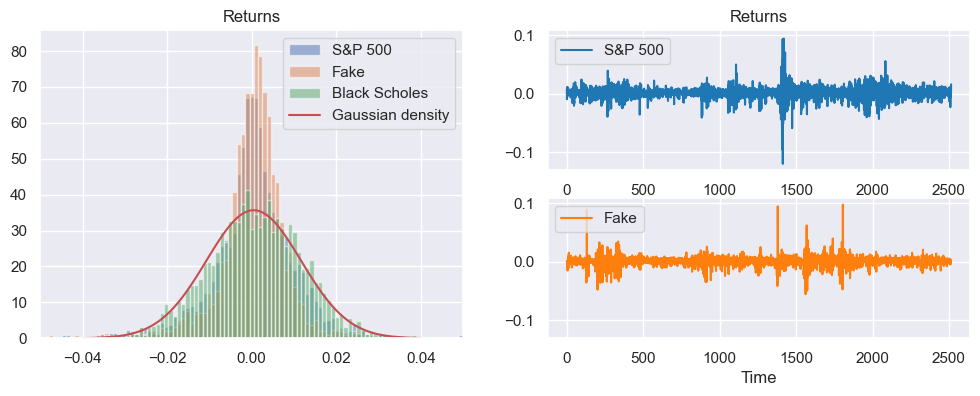

In [8]:
import matplotlib.pyplot as plt
from scipy import stats
from evaluations.eval_con import plot_returns
real_prices = ds.path
fake_prices = extended_paths_long[0][:len(real_prices)]
file_path = pt.join(output_dir, 'returns.png')
plot_returns(real_prices, fake_prices, file_path)

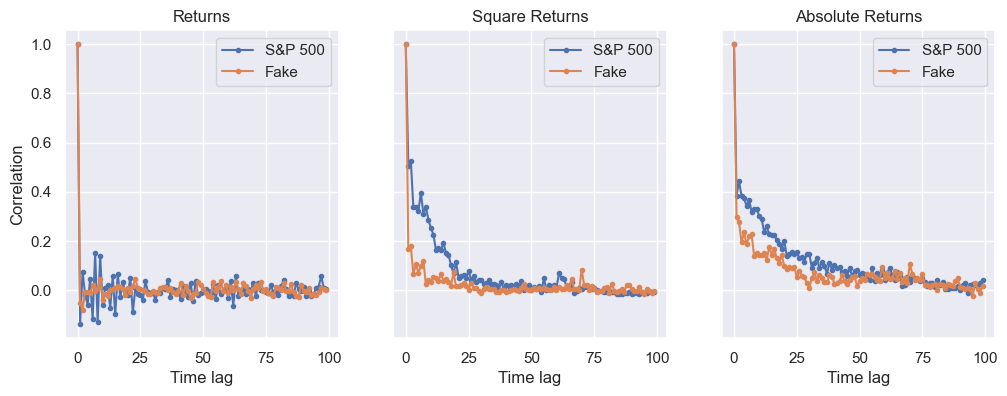

In [9]:
from evaluations.eval_con import plot_autocorrelation
file_path = pt.join(output_dir, 'ac.png')
plot_autocorrelation(real_prices, fake_prices, file_path = file_path)

In [10]:
extended_paths_for_stats = plot_path_extension(ds.path, model, exp_config, n_extend_path = 1000, n_extend_time = 10, plot = False)

100%|██████████| 1000/1000 [02:49<00:00,  5.88it/s]


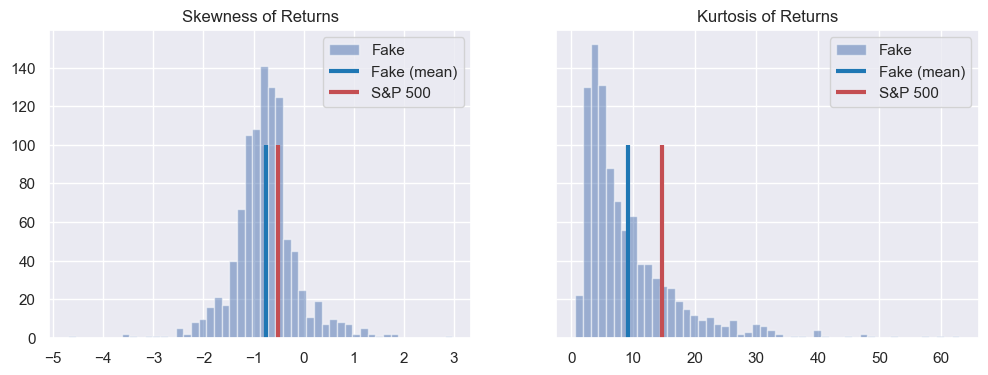

In [11]:
from evaluations.eval_con import plot_skew_kurtosis
# plot_skew_kurtosis(real_prices, extended_paths_for_stats,)
file_path = pt.join(output_dir, 'skew_kurtosis.png')
plot_skew_kurtosis(real_prices, extended_paths_for_stats, file_path = file_path)